In [1]:
import sys
sys.path.append('..')
import nbimport
nbimport.initialize()

In [2]:
from Stat_06 import *
css_styling()

# Histogrammer og fordelinger

# Histograms and distributions

## Formål

- At kunne bruge histogrammer som et analyse redskab. 
- At have en forståelse for sammenhængen mellem histogrammer og sandsynlighedsfordelinger. 
- At kunne lave histogrammer med og uden vægte. 
- At kunne skelne mellem frekvens- og ikke-frekvensvægte. 
- At kunne skelne mellem observations- og komponentvægte. 
- At kunne beregne usikkerheder på histogrammer.
- At på en robust måde lave histogrammer 

I statistisk data analyse bruger vi ganske ofte _histogrammer_ og _fordelinger_.   Det er derfor værd at sætte sig lidt ind i hvad disse to størrelser er.  

## Purpose

- To be able to use histograms as an analysis tool.
- To have an understanding of the relationship between histograms and probability distributions.
- Be able to make histograms with and without weights.
- To be able to distinguish between frequency and non-frequency weights.
- To be able to distinguish between observation and component weights.
- To be able to calculate uncertainties on histograms.
- To make histograms in a robust way

In statistical data analysis we often use _histograms_ and _distributions_. It is therefore worth putting a little throught into what these two concepts are.

## Hyppighedstabeller og pindediagrammer

Fra folkeskolen kender vi begrebet om _hyppighedstabeller_.   Lad bygge us lidt videre på det.

## Frequency tables and bar charts

From the elementary school we know of the concept of _frequency tables_. Let us build upon that a little further.

### Eksempel: Hyppighedstabel 

Lad os tænkte på en _diskret_ tilfældig variabel.   Her vil vi bruge summen af to 6-sidet terninger som eksempel.  Det betyder vi har de diskrete mulige udfald

$$ \{2,3,4,5,6,7,8,9,10,11,12\}\quad,$$

og hvor vi også ved at det mest hyppige udfald er $7$.   Lad os lave en hyppighedstabel i Python

### Example: Frequency table

Let us consider a _discrete_ random variable. Here we will use the sum of two 6-sided dice as an example. That means we have the discrete possible outcomes

$$ \{2,3,4,5,6,7,8,9,10,11,12\}\quad,$$

and where we also know that the most frequent outcome is $7$. Let's make a frequency table in Python

In [3]:
from numpy.random import randint 
twoD6 = randint(1,7,100)+randint(1,7,100)
print("Sum | Count Frequency")
sum = 0
for s in range(2,13):
    count = len(twoD6[twoD6==s])
    freq  = count / len(twoD6)
    print(f"{s:3d} | {count:5d}  {freq:.2f}")
    sum += count
assert(sum == len(twoD6))

Sum | Count Frequency
  2 |     1  0.01
  3 |     2  0.02
  4 |     5  0.05
  5 |    13  0.13
  6 |     9  0.09
  7 |    22  0.22
  8 |    21  0.21
  9 |    10  0.10
 10 |     7  0.07
 11 |     6  0.06
 12 |     4  0.04


Hyppighedstabellen ovenover fortæller os hvor mange gange vi har slået en sum med terningerne og den relative hyppighed.  Vi kan illustrerer denne hyppighedstabel grafisk med f.eks. et pindediagram 

The frequency table above tells us how many times we have obtained a sum value with the dice and the relative frequency. We can graphically illustrate this frequency table with e.g. a bar chart

Et søjlediagram over frekvens af målinger.

A bar chart of frequency of measurements.

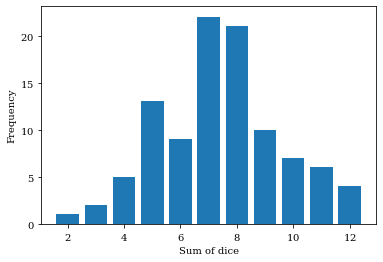

In [4]:
from matplotlib.pyplot import bar, xlabel, ylabel

bar(range(2,13),[len(twoD6[twoD6==s]) for s in range(2,13)])
xlabel("Sum of dice")
ylabel("Frequency");

Den grafiske fremstilling ovenover er på mange måder mere illustrativ end vores hyppighedstabel.  Vi ser f.eks. klart at $7$ må være det mest almindelige udfald og at 2 og 12 er langt mere sjældne. 

The graphical representation above is in many ways more illustrative than our frequency table. For example, we see clearly that $7$ must be the most common outcome and that 2 and 12 are much more rare.

Pindediagrammer som det ovenover er ganske nyttige i det tilfælde vi har en _diskret_ variable - f.eks. summen af to 6-sidet terninger.   I et pindediagram er højden typisk proportional med hyppigheden af ét udfald.  Udfald behøver ikke have en numerisk værdi, men har altid en diskret værdi.  

Bar charts as the above are quite useful in case we have a _discrete_ variable - e.g. the sum of two 6-sided dice. In a bar chart, the height is typically proportional to the frequency of one outcom. Outcomes need not have a numerical value, but will always have discrete values.

### Eksempel: Pindediagram af landedata

Her plotter vi [raten af dødfødte børn i forskellige lande](http://apps.who.int/gho/data/view.main.GSWCAH06v)

### Example: Bar chart of country data

Here we plot [the rate of stillborn children in different countries](http://apps.who.int/gho/data/view.main.GSWCAH06v)

Raten af dødfødte børn i en række lande.

The rate of stillborn children in a some countries.

In [5]:
data = {'Afghanistan': 26.7, 'Albania': 4.0, 'Algeria': 19.3, 'Andorra': 1.6,
        'Angola': 27.3, 'Antigua and Barbuda': 6.4, 'Argentina': 4.6,
        'Armenia': 13.8, 'Australia': 2.7, 'Austria': 3.6, 'Azerbaijan': 16.5,
        'Bahamas': 10.3, 'Bahrain': 5.5, 'Bangladesh': 25.4, 'Barbados': 8.5,
        'Belarus': 3.0, 'Belgium': 3.0, 'Belize': 9.8, 'Benin': 30.3,
        'Bhutan': 16.0, 'Bolivia (Plurinational State of)': 12.9, 
        'Bosnia and Herzegovina': 5.4, 'Botswana': 15.2, 'Brazil': 8.6, 
        'Brunei Darussalam': 6.5, 'Bulgaria': 5.7, 'Burkina Faso': 21.2, 
        'Burundi': 26.6, 'Cabo Verde': 14.3, 'Cambodia': 11.9, 'Cameroon': 19.6,
        'Canada': 3.1, 'Central African Republic': 34.4, 'Chad': 39.9,
        'Chile': 3.1, 'China': 7.2, 'Colombia': 8.1, 'Comoros': 30.5, 
        'Congo': 15.1, 'Cook Islands': 8.7, 'Costa Rica': 6.0, "Côte d'Ivoire": 26.7,
        'Croatia': 2.0, 'Cuba': 6.2, 'Cyprus': 3.6, 'Czechia': 2.5,
        "Democratic People's Republic of Korea": 13.5, 
        'Democratic Republic of the Congo': 27.3, 'Denmark': 1.7, 'Djibouti': 34.6, 
        'Dominica': 11.6, 'Dominican Republic': 11.1, 'Ecuador': 7.7, 'Egypt': 12.2, 
        'El Salvador': 12.2, 'Equatorial Guinea': 16.2, 'Eritrea': 22.5,
        'Estonia': 2.7, 'Eswatini': 12.3, 'Ethiopia': 29.7, 'Fiji': 11.9,
        'Finland': 1.8, 'France': 4.7, 'Gabon': 14.0, 'Gambia': 23.9,
        'Georgia': 11.2, 'Germany': 2.4, 'Ghana': 22.7, 'Greece': 3.6,
        'Grenada': 8.0, 'Guatemala': 11.9, 'Guinea': 21.1, 'Guinea-Bissau': 36.7, 
        'Guyana': 17.2, 'Haiti': 24.9, 'Honduras': 12.6, 'Hungary': 3.7,
        'Iceland': 1.3, 'India': 23.0, 'Indonesia': 13.2, 'Iran (Islamic Republic of)': 6.4, 
        'Iraq': 15.5, 'Ireland': 2.7, 'Israel': 4.2, 'Italy': 3.3, 'Jamaica': 18.8, 
        'Japan': 2.1, 'Jordan': 10.5, 'Kazakhstan': 6.5, 'Kenya': 22.5, 'Kiribati': 16.3, 
        'Kuwait': 5.1, 'Kyrgyzstan': 10.2, "Lao People's Democratic Republic": 23.7,
        'Latvia': 3.6, 'Lebanon': 9.9, 'Lesotho': 19.5, 'Liberia': 21.4,
        'Libya': 8.8, 'Lithuania': 3.2, 'Luxembourg': 2.8, 'Madagascar': 18.2,
        'Malawi': 21.8, 'Malaysia': 5.8, 'Maldives': 7.7, 'Mali': 32.5,
        'Malta': 3.5, 'Marshall Islands': 15.6, 'Mauritania': 27.1,
        'Mauritius': 9.5, 'Mexico': 5.5, 
        'Micronesia (Federated States of)': 17.8, 'Monaco': 5.7, 'Mongolia': 7.3, 
        'Montenegro': 3.9, 'Morocco': 24.5, 'Mozambique': 19.1, 'Myanmar': 20.0, 
        'Namibia': 11.3, 'Nauru': 15.5, 'Nepal': 18.4, 'Netherlands': 1.8, 
        'New Zealand': 2.3, 'Nicaragua': 7.4, 'Niger': 36.7, 'Nigeria': 42.9, 'Niue': 9.7,
        'Norway': 2.2, 'Oman': 8.5, 'Pakistan': 43.1, 'Palau': 8.4, 'Panama': 6.1, 
        'Papua New Guinea': 15.9, 'Paraguay': 13.4, 'Peru': 9.0,
        'Philippines': 10.9, 'Poland': 2.3, 'Portugal': 2.2, 'Qatar': 5.8,
        'Republic of Korea': 2.1, 'Republic of Moldova': 7.9, 'Romania': 4.1,
        'Russian Federation': 4.5, 'Rwanda': 17.3, 'Saint Kitts and Nevis': 7.5, 
        'Saint Lucia': 12.1, 'Saint Vincent and the Grenadines': 10.7,
        'Samoa': 11.1, 'San Marino': 2.5, 'Sao Tome and Principe': 16.3,
        'Saudi Arabia': 13.9, 'Senegal': 24.5, 'Serbia': 6.0, 'Seychelles': 9.5, 
        'Sierra Leone': 24.4, 'Singapore': 2.6, 'Slovakia': 2.9,
        'Slovenia': 2.9, 'Solomon Islands': 17.6, 'Somalia': 35.5, 
        'South Africa': 17.4, 'South Sudan': 30.1, 'Spain': 2.9, 'Sri Lanka': 4.9,
        'Sudan': 24.4, 'Suriname': 19.3, 'Sweden': 2.8, 'Switzerland': 2.8,
        'Syrian Arab Republic': 11.1, 'Tajikistan': 14.0, 'Thailand': 5.0,
        'The former Yugoslav republic of Macedonia': 7.7, 'Timor-Leste': 17.8,
        'Togo': 34.2, 'Tonga': 8.6, 'Trinidad and Tobago': 11.1, 'Tunisia': 9.2, 
        'Turkey': 7.0, 'Turkmenistan': 17.0, 'Tuvalu': 13.8, 'Uganda': 21.0, 
        'Ukraine': 8.8, 'United Arab Emirates': 7.4, 
        'United Kingdom of Great Britain and Northern Ireland': 2.9, 
        'United Republic of Tanzania': 22.4, 'United States of America': 3.0, 
        'Uruguay': 6.6, 'Uzbekistan': 12.0, 'Vanuatu': 13.9, 
        'Venezuela (Bolivarian Republic of)': 7.1, 'Viet Nam': 10.1, 'Yemen': 29.0, 
        'Zambia': 20.9, 'Zimbabwe': 20.6}

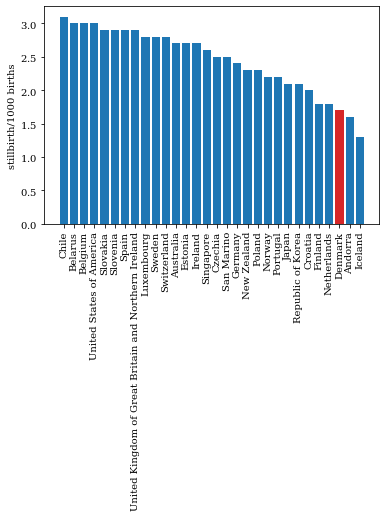

In [6]:
from matplotlib.pyplot import xticks 

sdata = sorted(data.items(),key=lambda i: i[1],reverse=True)
countries, rates = zip(*sdata)
bar(countries[-30:],rates[-30:])
bar(countries[-3],rates[-3],color="tab:red")
ylabel("stillbirth/1000 births")
xticks(rotation=90);

## Histogrammer

Hvis vores variabel derimod er _kontinuer_ over et vist område, vil vi typisk inddele de mulige udfald i _bøtter_ (engl. [_bins_](https://en.wikipedia.org/wiki/Data_binning)), og vi vil repræsenterer vores data med et _histogram_ (engl. [_histogram_](https://en.wikipedia.org/wiki/Histogram)). 

Hvis vores data falder over intervallet $D$ vil vores $b_i$ bøtter inddele dette interval i $N$ _eksklusive_ dele

## Histograms

On the other hand, if our variable is _continuous_ over a given range, we will typically divide the possible outcomes into [_bins_](https://en.wikipedia.org/wiki/Data_binning), and we will represent our data with a [_histogram_](https://en.wikipedia.org/wiki/Histogram).

If our data falls over the domain $D$, our $b_i$ bins will divide this range into $N$
_exclusive_ parts

$$ D = \bigcup_{i=1}^N b_i\quad,$$

og vi har at $b_i \subseteq D$.  Det vel sige 

and we have that $b_i \subseteq D$. That is

$$\forall x\in D\ \exists!\,i\in[1,\ldots,N] : x\in b_i\quad,$$ 

eller at $x$ kun "falder" i én (og kun én) bøtte. 

or that $x$ only "falls" into one (and only one) bin.

Bøtterne $b_i$ behøver ikke alle at være lige store - ofte vil bøtte-størrelsen afhænge af mange faktorer, som f.eks. 

- Præcision af måleapperaturet 
- Antallet af observationer
- Usikkerheder i observationerne 

Dog gælder der for et histogram at _arealet_ af en bøtte er proportional med hyppigheden af udfaldene som bøtten dækker.  I et pindediagram havde vi at _højden_ var proportional med hyppigheden. 

Hvis $P_i$ er hyppigheden af udfald i bøtten $b_i$ med størrelen $l_i$ har vi da at 

The bins $b_i$ need not all be of equal size - often the bin sizes will depend on many factors, such as.

- Precision of the measuring apparatus
- The number of observations
- Uncertainties in the observations

However, for a histogram, the _area_ of a bin is proportional to the frequency of the outcomes covered by the bin. In a bar chart, we had that _height_ was proportional to frequency.

If $P_i$ is the frequency of outcomes in the bin $b_i$ with the size $l_i$ we have that

$$ P_i \propto h_i l_i\quad,$$ 

hvor $h_i$ er højden eller værdien af bøtten for $x\in b_i$. 

where $h_i$ is the height or value of the bin for $x\in b_i$.

### Eksempel: Histogram af henfaldsrate 

Her vil vi simulerer målinger af antallet af radioaktive henfald som funktion af tiden.   Vi modellerer dette med tilfældige tal $x_i$ trukket fra en eksponentiel fordeling $e^{-x}$.  Her lader vi _NumPy_ vælge antallet af bøtter (standarden er 10 bøtter) i intervalet $[\min(x),\max(x)]$.

### Example: Histogram of decay rate

Here we will simulate measurements of the number of radioactive decays as a function of time. We model this with random numbers $x_i$ drawn from an exponential distribution $e^{-x}$. Here we let _NumPy_ select the number of bins (the default is 10 bins) in the $[\min(x),\max(x)]$ interval.

Normaliseret histogram.  Histogrammet viser den observeret _sandsynligheden_ for et henfald som funktion af tiden.

Normalized histogram. The histogram shows the observed _probability_ of a decay as a function of time.

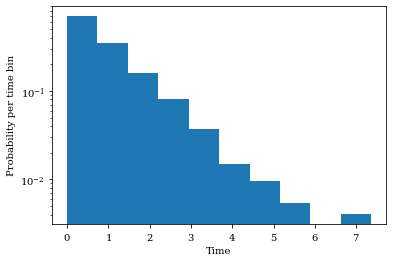

In [7]:
from numpy.random import exponential 
from matplotlib.pyplot import hist, yscale 

t = exponential(size=1000)
hist(t,density=True)
yscale("log")
ylabel("Probability per time bin")
xlabel("Time");

Ovenover har vi brugt `matplotlib.pyplot.hist` til _både_ at lave vores histogram og tegne det.  Vi har ligeledes lavet valget `density=True` for at sikre at _arealet_ af repræsentation er proportional med hyppigheden.  Valget `density=True` dividere desuden også indholdet af hver bøtte med det totale indhold, sådan at højden $h_i$ er givet ved

Above, we have used `matplotlib.pyplot.hist` to make our histogram _and_ draw it. We also gave the option `density=True` to ensure that the _area_ of representation is proportional to frequency. The `density=True` option also divides the contents of each bin by the total content, so that the height $h_i$ is given by

$$ h_i = \frac{c_i}{\sum_{i=1}^N c_i}\frac1{l_i} \quad,$$ 

hvor $c_i$ er antallet af tællinger i $b_i$, og dermed 

where $c_i$ is the number of counts in $b_i$, and hence

$$ \sum_{i=1}^N l_i h_i = \sum_{i=1}^N P_i = 1\quad.$$

Et sådant _normaliseret_ histogram udtrykker en _observeret sandsynlighedsfordeling_.  Vi kan aflæse sandsynligheden for $x\in b_i$ fra histogrammet ved $l_i h_i$.  

Such a _normalized_ histogram expresses an _observed probability distribution_. We can read off the probability of $x\in b_i$ from the histogram by $l_i h_i$.

### Eksempel: Histogram som sandsynlighedstabel 

Lad os tage vores data fra oven over og gemme indholdet i `h` og bøttegrænserne i `b`

### Example: Histogram as probability table

Let's take our data from above and save the contents in `h` and the bin limits in` b`

In [8]:
from numpy import histogram

h, b = histogram(t,density=True)

Lad os udskrive sandsynlighederne i hver bøtte

Let us write out the probabilities in each bin

In [9]:
print("Low    High | Probability")
sum = 0
for y, l, u in zip(h,b[:-1],b[1:]):
    p   =  y * (u-l)
    sum += p
    print(f"{l:.2f} - {u:.2f} | {p:.3f}")
print(" Sum        | {}".format(sum))

Low    High | Probability
0.00 - 0.74 | 0.514
0.74 - 1.47 | 0.257
1.47 - 2.21 | 0.117
2.21 - 2.95 | 0.060
2.95 - 3.68 | 0.027
3.68 - 4.42 | 0.011
4.42 - 5.15 | 0.007
5.15 - 5.89 | 0.004
5.89 - 6.63 | 0.000
6.63 - 7.36 | 0.003
 Sum        | 1.0


Vi ser også at vi har meget få tællinger i den høje ende.  Lad os lave vores bøtter anderledes så at vi har flere tællinger i de bøtter.  Vi vælger at inddele intervalet $[0,9]$ i bøtterne 

We see that we have very few counts in the high end. Let us define our bins differently so we have more counts in the higher bins. We choose to divide the interval $[0,9]$ into the bins (ranges)

$$ [0,1),[1,2),[2,3),[3,4),[4,5),[5,7),[7,9]\quad.$$

Bemærk at alle intervalerne er halv-åbne _pånær_ det sidste som er lukket. 

Vi plotter det sammen med de bøtter vi fik uden at specificere vores bøtter. 

Note that all the intervals are half-open _except_ the last one which is closed.

We plot the data binned as above together with the previous binning.

Ikke-ækvidistente bøtter.

Non-equidistant bins.

In [10]:
from matplotlib.pyplot import legend 

hist(t,                  density=True,alpha=.5,label="Default binning")
hist(t,[0,1,2,3,4,5,7,9],density=True,alpha=.5,label="Custom binning")
xlabel("Time")
ylabel("Probability per time bin")
yscale("log")
legend();

Her er det værd at bemærke at dersom vi _ikke_ havde valget `density=True`, så ville $h_i=c_i$ og vi ville _ikke_ have et histogram i egentlig forstand.   Valget `density=True` har dog den bivirkning at integralet bliver normaliseret til 1, hvilket ikke altid er ønskværdigt.  Hvis vi _bare_ vil have at 

Here it is worth to note that if we _did not_ have give the option `density=True` then $h_i=c_i$ and we would _not_ have a histogram in the true sense. However, the `density=True` option has the side effect that the integral is normalized to 1, which is not always desirable. If we want that

$$h_i = \frac{c_i}{l_i}\quad = \frac{p_i}{l_i}\sum_{i=1}^N c_i,$$

svarende til at arealet af bøtten $b_i$ er $c_i$, så bliver vi nød til at gøre lidt arbejde selv

corresponding to the area of each bin $b_i$ is $c_i$, then we have to do a little work ourselves

Tæltal-_tæthed_ af henfald som funktion af tid. 

Count _density_ of decay as a function of time.

In [11]:
nt = len(t)
nd, bd = histogram(t,density=True)
nc, bc = histogram(t,[0,1,2,3,4,5,7,9],density=True)
nd *= nt 
nc *= nt
bar((bd[:-1]+bd[1:])/2,nd,(bd[1:]-bd[:-1]),alpha=0.5,label="Default binning")
bar((bc[:-1]+bc[1:])/2,nc,(bc[1:]-bc[:-1]),alpha=0.5,label="Custom binning")
yscale("log")
xlabel("Time")
ylabel("Counts per time bin")
legend();

Bemærk at vi har ændret titlen by ordinaten ("$y$"-aksen) fra "Probability per time bin" til "Counts per time bin". 

Note that we have changed the title of the ordinate ("$y$" axis) from "Probability per hour bin" to "Counts per time bin".

### Usikkerheder

Som tidligere nævnt, så er et resultat meningsløst uden usikkerheder.  Det samme gælder selvføgelig også resultater præsenteret i et histogram.  Lad os derfor tænkte lidt over _tællinger_ (engl. [_counts_](https://en.wikipedia.org/wiki/Count_data)) som er det vi har i et histogram - og deres usikkerheder. 

### Uncertainties

As mentioned earlier, a result is meaningless without any uncertainties. Of course, the same applies to results presented in a histogram. So let's think a little bit about [_counts_](https://en.wikipedia.org/wiki/Count_data) - which is what we have in a histogram - and their uncertainties.

[Poisson fordelingen](https://en.wikipedia.org/wiki/Poisson_distribution)

The [Poisson distribution](https://en.wikipedia.org/wiki/Poisson_distribution)

$$
f_P(n;\lambda) = \frac{\lambda^n}{n!}e^{-\lambda}\quad,
$$

beskriver sandsynligheden for $n$ tilfælde over et interval, hvor hver hændelse er _uafhængig_ af andre hændelser, og hændelserne sker med en nogenlunde konstant rate.  Denne fordeling er derfor ofte en god beskrivelse af tællinger. 

Poission fordelingen er en _diskret_ fordeling.  Det vil sige at $n$ kan antage de _diskrete_ værdier $n\in\mathbb{N}_0$. Middelværdien - eller den forventet værdi af $n$ - er givet ved 

describes the probability of $n$ events over an interval where each event is _independent_ of other events and the events occur at a fairly constant rate. This distribution is therefore often a good description of number of counts.

The Poisson distribution is a _discrete_ distribution. That is, $n$ can assume the _discrete_ values $n\in\mathbb{N}_0$. The mean value - or the expected value of $n$ - is given by

$$\mu_P = \lambda\quad,$$

og variansen ved

and the variance by

$$\sigma_{P}^2 = \lambda\quad.$$

Bemærk at vi har brugt $\mu,\sigma^2$ snare end $\bar{n},s_n^2$ da vi snakker om _fordelingens_ middelværdi og varians modsat _prøvens_ gennemsnit og varians. 

Da vores estimate af sandsynligheden for $x\in b_i$ er givet ved tallet $c_n$, finder vi at usikkerheden på dette estimat er givet ved 

Note that we have used $\mu,\sigma^2$ rather than $\bar{n},s_n^2$ as we are talking about the _distribution_ mean value and variance as opposed to _sample_ mean and variance.

Since our estimate of the probability of $x\in b_i$ is given by the number $c_n$, we find that the uncertainty of this estimate is given by

$$\delta_{b_i} = \sqrt{\frac{s_n^2}{N}} = \sqrt{\frac{s_n^2}{1}} = \sqrt{\sigma^2_p} = \sqrt{\lambda} = \sqrt{c_i}\quad,$$

hvor vi har at $N=1$ da vi kun har én observation, og hvor vi har antaget at tællingen $c_i$ er Poisson fordelt og estimatet af middelværdien $\lambda$ er givet ved $c_i$.  

where we have that $N=1$ since we only have one observation, and where we have assumed that the count $c_i$ is Poisson distributed and an estimate of the mean $\lambda$.

### Eksempel: Normalfordeling 

For at gøre det lidt nemmere for os, vil vi definerer en funktion som ikke kun laver histogrammet af data, men også giver os bøtte midpunkter og breder, det ikke-normaliseret indhold, og usikkerheden i hvert punkt. 

### Example: Normal distribution

To make it a little easier for us, we will define a function that not only makes the histogram of data, but also gives us the bin midpoints and widths, the non-normalized content, and the uncertainty in each point.

In [12]:
def histogram(x,bins=None,normalize=False):
    from numpy import histogram as nphist
    from numpy import sqrt
    
    if bins is None: 
        bins = 10
    
    total =  len(x)
    c, b  =  nphist(x,bins,density=True)
    c     *= total
    w     =  b[1:]-b[:-1]
    e     =  sqrt(c) / sqrt(w)
    
    if normalize:
        c /= total
        e /= total
    
    return c, 0.5*(b[1:]+b[:-1]), w, e

Vi laver også en hjælpe funktion til at tegne disse histogrammer. 

We also do a helper function to draw these histograms.

In [13]:
def plot_hist(n,x,wx,en,b=None,*,ax=None,as_bar=False,**kwargs):
    from matplotlib.pyplot import gca 
    
    ax = gca() if ax is None else ax 
    
    if as_bar:
        return ax.bar(x,n,wx,b,xerr=wx/2,yerr=en,**kwargs)
    
    return ax.errorbar(x,n,en,xerr=wx/2,**kwargs)

Lad os lave et histogram af af tilfældige tal fra en normalfordeling.  Vi illustrerer usikkerheden både med linje og med Poisson fordelinger for at det tydligere at se sammenhængen. 

Let us make a histogram of random numbers from a normal distribution. We illustrate the uncertainty both with a line and with Poisson distributions in order to see the connection more clearly.

In [14]:
def plot_hist_with_poisson(n,x,wx,en,ax=None,poisson_kw={},**kwargs):
    from matplotlib.pyplot import plot, gca
    from scipy.stats import poisson 
    from numpy import linspace,newaxis
    
    ax = gca() if ax is None else ax 
    
    plot_hist(n,x,wx,en,as_bar=True,ax=ax,**kwargs)
    y = linspace(poisson.ppf(.02,n),poisson.ppf(.9999,n),20).astype(int)
    z = poisson.pmf(y, n)
    z *= wx / 2 / z.max(axis=0) 
    z =  x + wx/4 - z 
    
    kw = poisson_kw.copy()
    kw.setdefault('label','Poisson')
    for xx,yy in zip(z.T,y.T):
        plot(xx,yy,**kw)
        if 'label' in kw: del kw['label']

Illustration af usikkerheder i et histogram.  De stiplet linjer viser en Poisson fordeling med middelværdi givet ved bøtte værdien.  De røde streger viser standard afvigelsen af Poisson fordelingerne og usikkerheden på bøtternes værdi.

Illustration of uncertainties in a histogram. The dashed lines show a Poisson distribution with mean value given by the bucket value. The red lines show the standard deviation of the Poisson distributions and the uncertainty of the value of the buckets.

In [15]:
from numpy.random import normal 

x = normal(size=1000)
c, bm, bw, e = histogram(x,normalize=False)
plot_hist_with_poisson(c,bm,bw,e,alpha=.5,
                       label='Data',ecolor='tab:red',
                       error_kw={'label':'Uncertainty'},
                       poisson_kw={'color':'k','ls':'--'})
xlabel('$x$')
ylabel(r'$\mathrm{d}N/\mathrm{d}x$  count density')
legend();

Figuren ovenover illustrerer hvorledes vi forstår usikkerheden på et histogram.   Gentager vi målingen forventer vi $c_i$ med en margen på $\sqrt{c_i}$.  Figuren illustrerer også at bøtter med få tællinger har store _relative_ usikkerheder.  En bøtte med $c_i=1$ har $\delta_{b_i}=1$ eller 100% relativ usikkerhed.  En bøtte med $c_i=10$ har $\delta_{b_i}=\sqrt{10}\approx 3.2$ eller lidt over 30% relativ usikkerhed.  Vi vil derfor ofte søge at sikre at vores bøtter har _mindst_ 10 tællinger ved at justerer vores bøttestørrelser. 

The figure above illustrates how we understand the uncertainties of a histogram. If we repeat the measurement, we expect $c_i$ with a margin of $\sqrt{c_i}$. The figure also illustrates that bins with a few counts have large _relative_ uncertainties. A bin of $c_i=1$ has $\delta_{b_i}=1$ or 100% relative uncertainty. A bin with $c_i=10$ has $\delta_{b_i}=\sqrt{10}\approx 3.2$ or slightly more than 30% relative uncertainty. We will therefore often seek to ensure that our bins have _at least_ 10 counts by adjusting our bin sizes.

Bemærk at aksernes titler. Abcissaen ("$x$"-aksen) er benævnt $x$, mens ordinaten ("$y$"-aksen) har 

Note that the axes titles. The abcissa (the "$x$" axis) is called $x$, while the ordinate ("$y$" axis) has

$$\frac{\mathrm{d}N}{\mathrm{d}x}\quad,$$

som kan læses "ændringen i antal tællinger $N$ per ændringer i $x$" - eller "Counts per $x$ bin".   Dette er for at illusterer at histogrammet repræsenterer en _fordeling_, forstået på den måde at histogrammet viser sandsynligheden for $x$. Sammenhængen mellem et histogram og en _sandsynlighedsfordeling_ vil blive behandlet senere. 

which can be read "the change in number of $N$ per change in $x$" - or "Counts per $x$ bin". This is to illustrate that the histogram represents a _distribution_, meaning that the histogram shows the probability of $x$. The relationship between a histogram and a _probability distribution_ will be discussed later.

Ofte tegner vi histogrammer som ovenover - som sammenhængende søjler.   Andre gange giver det dog mere mening at tegne histogrammet som punkter med tilhørende usikkerheder i begge retninger 

We often draw histograms as above - as continuous columns. At other times, however, it makes more sense to draw the histogram as points with associated uncertainties in both directions

Normaliseret tælletæthed.  Histogrammet er normaliseret til integralet.

Normalized count density. The histogram is normalized to the integral.

In [16]:
x = normal(size=1000)
c, bm, bw, e = histogram(x,normalize=True)
plot_hist(c,bm,bw,e,fmt='*',label='Data')
xlabel("$x$")
ylabel(r"$1/N\,\mathrm{d}N/\mathrm{d}x$");

Her har vi valgt at normaliserer histogrammet (`normalize=True`) sådan at integralet er 1.   Derfor har vi også eksplicit ændret titlen på ordinaten ("$y$"-aksen) til 

Here we have chosen to normalize the histogram (`normalize=True`) such that the integral is 1. Therefore, we have also explicitly changed the title of the ordinate ("$y$" axis) to

$$
\frac{1}{N}\frac{\mathrm{d}N}{\mathrm{d}x}\quad,
$$

som kan læses "Probability per $x$ bin".   Højden af hver punkt da 

which can be read "Probability per $x$ bin". The height of each point then

$$
h_i = \frac{c_i}{\sum_{i=1}^N c_i} \frac1{l_i}\quad,
$$

og usikkerhederne 

and the uncertainties

$$
\delta_{h_i} = \frac{\sqrt{c_i}}{\sum_{i=1}^N c_i} \frac1{l_i}\quad,
$$

så at 

so that

$$
\delta_{P_i} = \frac{\sqrt{c_i}}{\sum_{i=1}^N c_i} = \delta_{h_i} l_i\quad.
$$

## Vægtet histogram

I nogle tilfælde er vores observationer karakteriseret ikke kun ved ét tal $x_j$, men også ved en vægt $w_j$. I det tilfælde kan vi stadig bruge et histogram til at illustrerer vores data.  Antallet af tællinger i bøtten $b_i$ er da givet ved 

## Weighted histogram

In some cases, our observations are characterized not only by one number of $x_j$, but also by a weight $w_j$. In that case, we can still use a histogram to illustrate our data. The number of counts in the bin $b_i$ is then given by

$$c_i = \sum_{x_j\in b_i} w_j\quad.$$

### Eksempel: Vægtet histogram

Lad os igen trække tal fra en normalfordeling med vægte trukket fra en flad fordeling mellem 0 og 1. 

### Example: Weighted histogram

Let us again draw numbers from a normal distribution with weights drawn from a flat distribution between 0 and 1.

Et histogram af frekvensvægtet observationer.

A histogram of frequency-weighted observations.

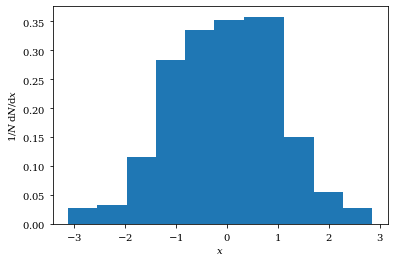

In [17]:
from numpy import histogram as nphistogram 
from numpy.random import random 

x    = normal(size=1000)
w    = random(len(x))
h, b = nphistogram(x,weights=w,density=True)

bar(0.5*(b[1:]+b[:-1]),h)
xlabel(r"$x$")
ylabel(r"$1/N\,\mathrm{d}N/\mathrm{d}x$");

Usikkerheden på hver bøtte $b_i$ afhænger af hvilke type vægte vi har brugt.  

Hvis vores vægte er _frekvensvægte_ - altså vægten $w_i$ siger at vi har observeret $x_i$ $w_i\in\mathbb{N}_0$ gange, så er usikkerheden givet ved det totale antal tællinger 

The uncertainty of each bin $b_i$ depends on the type of weights we have used.

If our weights are _frequency weights_ - i.e., the weight $w_i$ says we have observed $x_i$  $w_i\in\mathbb{N}_0$ times, then the uncertainty is given by the total number of counts

$$\delta_{c_i} = \sqrt{\sum_{x_j \in b_i} w_i} = \sqrt{c_i}\quad,$$

akkurat som tidligere. 

Er vægtene derimod _ikke_ frekvensvægte har vi at usikkerheden er 

just like before.

On the other hand, if the weights are _not_ frequency weights, we have the uncertainty

$$ \delta_{c_i} = \sqrt{\sum_{x_j\in b_i} w_j^2}\quad.$$

For at se dette bruger vi igen Poisson hypotesen og ser at 

To see this we again use the Poisson hypothesis and see that

\begin{align*}
  \operatorname{Var}(c_i) &= \operatorname{Var}\left(\sum_{x_j\in b_i} w_j\right)\\
  &= \sum_{x_j\in b_i} \operatorname{Var}(w_j)\\
  &= \sum_{x_j\in b_i} w_j^2 \operatorname{Var}\left((f_P(\lambda=1)\right)\\
  &= \sum_{x_j\in b_i} w_j^2\quad,
\end{align*}

hvor $\operatorname{Var}\left(f_P(\lambda=1)\right)=1$ da vi har én måling med konstanten $w_j$, og $\operatorname{Var}(cx) = c^2\operatorname{Var}(x)$ for en konstant $c$.  Hvis alle vægte er 1 genfinder vi formlen $\delta_{c_i}=\sqrt{c_i}$ som tidligere. 

Bemærk at _NymPy_'s funktion `numpy.histogram` _ikke_ beregner $\sum_{x_j\in b_i}w_j^2$ hvorfor vi ikke kan bruge den funktion i tilfælde af vægte der _ikke_ er frekvensvægte. 

where $\operatorname{Var}\left(f_P(\lambda=1)\right)=1$ since we have one measurement with constant $w_j$, and $\operatorname{Var}(cx) = c^2\operatorname{Var}(x)$ for a constant $c$. If all weights are 1 we find the formula $\delta_{c_i}=\sqrt{c_i}$ as before.

Note that _NymPy_'s function `numpy.histogram` _does not_ calculate $\sum_{x_j\in b_i}w_j^2$ so we cannot use that function in case of weights that are _not_ frequency weights.

Lad os skrive en funktion der passende kan beregne vores usikkerheder dersom vi ikke har frekvensvægte.  Vi vil gerne bruge denne funktion generelt, så vi genbruger `numpy.histogram` der hvor det giver mening. 

Let us write a function that can properly calculate our uncertainties if we do _not_ have frequency weights. We would like to use this function in general, so we reuse `numpy.histogram` where it makes sense.

In [18]:
def histogram(a,bins="auto",rnge=None,weights=None,frequency=True,normalize=False):
    from numpy import histogram as nphist
    from numpy import sqrt, diff
    
    if weights is not None and (weights < 0).any():
        raise ValueError("Negative weights does not make sense")
        
    if weights is None or frequency:
        if weights is not None and weights.dtype.kind != 'i':
            raise ValueError("Frequency weights are not integer")

        total = len(a) if weights is None else weights.sum()
        n, b = nphist(a,bins=bins,range=rnge,weights=weights,density=True)
        n *= total
        db = diff(b)
        e =  sqrt(n) / sqrt(db)
        
        if normalize:
            n /= total
            e /= total
    
        return n, 0.5*(b[1:]+b[:-1]), db, e
    
    try:
        from numpy import double as npdouble
        from numpy import complex as npcomplex
        from numpy import intp as npintp
        from numpy import can_cast, logical_and, bincount, zeros
        from numpy import argsort, concatenate, sqrt
        # These require NumPy 1.15 or better 
        # Note, this is a little dangerous as NumPy may change this around at any time
        from numpy.lib.histograms import _ravel_and_check_weights
        from numpy.lib.histograms import _search_sorted_inclusive
        from numpy.lib.histograms import _get_bin_edges, _unsigned_subtract
    except ImportError as e:
        from numpy.version import version as npversion
        raise ImportError("NumPy version 1.15 or newer needed, have {}: {}"
                         .format(npversion, e))
        
    a, weights = _ravel_and_check_weights(a,weights)
    bin_edges, uniform_bins = _get_bin_edges(a, bins, rnge, weights)
    ntype = weights.dtype
    
    simple_weights = can_cast(ntype,npdouble) or can_cast(ntype,npcomplex)
        
    BLOCK = 65536
    
    if uniform_bins is not None and simple_weights:
        first, last, nbin = uniform_bins
        
        n    = zeros(nbin, ntype)
        w2   = zeros(nbin, ntype)
        norm = nbin / _unsigned_subtract(last,first)
        
        for i in range(0,len(a),BLOCK):
            tmp_a = a[i:i+BLOCK]
            tmp_w = weights[i:i+BLOCK]
            
            keep  =  (tmp_a >= first)
            keep  &= (tmp_a <= last)
            if not logical_and.reduce(keep):
                tmp_a = tmp_a[keep]
                tmp_w = tmp_w[keep]
                
            tmp_a = tmp_a.astype(bin_edges.dtype, copy=False)
            
            f_indexes = _unsigned_subtract(tmp_a, first) * norm
            indexes   = f_indexes.astype(npintp)
            indexes[indexes == nbin] -= 1
            
            decrement = tmp_a < bin_edges[indexes]
            indexes[decrement] -= 1
            
            increment = ((tmp_a >= bin_edges[indexes+1]) 
                         & (indexes != nbin-1))
            
            if ntype.kind == 'c':
                n.real += bincount(indexes,weights=tmp_w.real,minlength=nbin)
                n.imag += bincount(indexes,weights=tmp_w.imag,minlength=nbin)
            else: 
                n += bincount(indexes,weights=tmp_w,minlength=nbin)
            w2 += bincount(indexes,weights=tmp_w**2,minlength=nbin)
    
    else:
        cum_n  = zeros(bin_edges.shape, ntype)
        cum_w2 = zeros(bin_edges.shape, ntype) 
        zero   = zeros(1, dtype=ntype)
        
        for i in range(0,len(a),BLOCK):
            tmp_a = a[i:i+BLOCK]
            tmp_w = weights[i:i+BLOCK]
            
            sortidx = argsort(tmp_a)
            sa  = tmp_a[sortidx]
            sw  = tmp_w[sortidx]
            cw  = concatenate((zero, sw.cumsum()))
            cw2 = concatenate((zero, (sw**2).cumsum()))
            bin_index = _search_sorted_inclusive(sa, bin_edges)
            cum_n  += cw[bin_index]
            cum_w2 += cw2[bin_index]
            
        n  = diff(cum_n)
        w2 = diff(cum_w2)
        
    
    db = diff(bin_edges)
    mb = (bin_edges[1:]+bin_edges[:-1]) / 2
    r  = n / db
    e  = sqrt(w2)
    
    if normalize:
        r /= n.sum()
        e /= n.sum()
        
    return r, mb, db, e

Med dette har vi en generel metode til at definerer et histogram hvad enten vi bruger vægte (både frekvens- og ikke-frekvensvægte).  

With this we have a general method for defining a histogram whether or not we use weights (both frequency and non-frequency weights).

### Eksempel: Vægtet histogram med ikke-frekvensvægte 

Lad os bruge vores funktion fra ovenover til at lave et histogram hvor vi bruger vægte der ikke repræsenterer frekvensvægte.  Her trækker vi 1000 observationer fra en normalfordeling med vægte mellem 0 og 1 for hver observation. 

### Example: Weighted histogram with non-frequency weights

Let's use our function from above to create a histogram where we use weights that do not represent frequency weights. Here we draw 1000 observations from a normal distribution with weights between 0 and 1 for each observation.

Et histogram af _ikke_-frekvens vægtet observationer.

A histogram of _not_ frequency weighted observations.

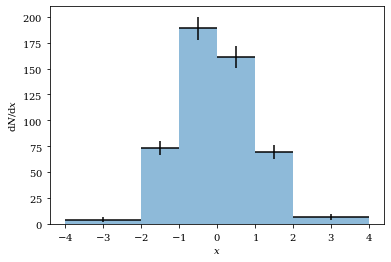

In [19]:
x = normal(size=1000)
w = random(len(x))
h, bm, bw, e = histogram(x,bins=[-4,-2,-1,0,1,2,4],weights=w,frequency=False)
plot_hist(h,bm,bw,e,alpha=.5,as_bar=True)
xlabel(r"$x$")
ylabel(r"$\mathrm{d}N/\mathrm{d}x$");

## Løbende opdatering af histogram

Ofte kan vi have brug for at _fylde_ et histogram løbende.  Lad os lave nogle funktioner der hjælper os med det. 

Den første funktion `init_histogram` laver den struktur vi skal bruge.   Den tager en liste af bøtte grænser, lavet f.eks. med *NumPy*s `linspace`, og returner strukturen vi vil bruge bagefter. 

## Continuous update of histogram

We often need to _fill_ a histogram continuously. Let's do some functions that help us with that.

The first function `init_histogram` makes the structure we need. It takes a list of bin limits, made for example by *NumPy* s `linspace` and returns the structure we want to use afterwards.

In [20]:
def init_histogram(bins,weighted=False):
    from numpy import zeros, zeros_like
    if len(bins) < 2:
        raise ValueError("Must have at least 1 bin")
    if not all([f<l for f, l in zip(bins[:-1],bins[1:])]):
        raise ValueError('bins must be increasing')
        
    sumw = zeros(len(bins)-1)
    sumw2 = None
    
    if weighted:
        sumw2 = zeros_like(sumw)
        
    return bins, sumw, sumw2

Funktionen `fill_histogram` tager en værdi `x`, bøtte grænserne `bins` og det nuværende indhold af histogrammet.  Funktionen returnerer det nye indhold af histogrammet.  Vi kan give strukturen lavet med `init_histogram` med en `*` foran som det andet argument. 

The `fill_histogram` function takes a value` x`, the bin boundaries `bins` and the current content of the histogram. The function returns the new content of the histogram. We can give the structure made with `init_histogram` with a` * `in front as the second argument.

In [21]:
def _fill_histogram(x,bins,sumw,sumw2,weight):
    from bisect import bisect_left, bisect_right
    
    if weight < 0: 
        raise ValueError("Weight is negative")
        
    if not (bins[0] <= x <= bins[-1]):
        return bins, sumw, sumw2
    
    idx = bisect_right(bins,x)-1
    if idx == len(bins)-1:
        idx -= 1
          
    sumw[idx] += weight
    if sumw2 is not None:
        sumw2[idx] += weight**2
        
    return bins, sumw, sumw2

def fill_histogram(x,bins,sumw,sumw2=None,weight=1):
    
    if len(bins) != len(sumw)+1:
        raise ValueError("Inconsistent size of bins and sum weights")
    
    if sumw2 is not None and len(sumw) != len(sumw2):
        raise ValueError("Size of sum of weigts and sum of square weights inconsistent")
    
    if sumw2 is None and not isinstance(weight, int):
        raise ValueError("Sum squared weights not given, but weight is not integer")
    
    return _fill_histogram(x,bins,sumw,sumw2,weight)

Endelig har vi funktionen `fini_histogram` som beregner det endelige histogram - altså skalerer med bøttelængderne og, som tilvalg, normaliserer histogrammet.  

Finally, we have the function `fini_histogram` which calculates the final histogram - i.e., scales with the bni widths and, as an option, normalizes the histogram.

In [22]:
def _fini_histogram(bins,sumw,sumw2,normalize):
    from numpy import diff, sum, sqrt, asarray
    
    b = asarray(bins)
    m = 0.5 * (b[1:]+b[:-1]) # Calculate bin centres ...
    w = diff(b)              # ... and widths 
    t = sum(sumw)            # Calculate integral 
    e = sqrt(sumw)           # Calculate uncertainty 
    if sumw2 is not None:   
        e = sqrt(sumw2)
        
    h = sumw / w             # Scale by bin widths 
    e /= w                   # Also errors 
    
    if normalize:            # Normalize to integral
        h /= t
        e /= t 
        
    return h, m, w, e

def fini_histogram(bins,sumw,sumw2=None,normalize=False):
    if len(bins) != len(sumw)+1:
        raise ValueError("Inconsistent sizes of bins and content")
        
    if sumw2 is not None and len(sumw) != len(sumw2):
        raise ValueError("Inconsistent sizes of sum weights and sum square weights")
        
        
    return _fini_histogram(bins,sumw,sumw2,normalize)

### Eksempel: Løbende opdatering af histogram 

Lad os lave et histogram af en normalfordelt variabel 

### Example: On-line histogram updates

Let's make a histogram of a normally distributed variable

Et histogram der er løbende opdateret.

A histogram that is constantly updated.

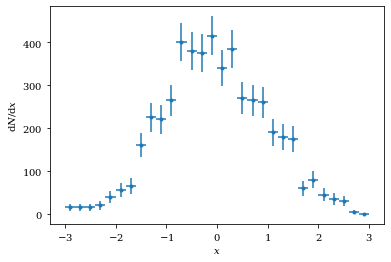

In [23]:
from numpy import linspace

hist = init_histogram(linspace(-3,3,31))

for x in normal(size=1000):
    hist = fill_histogram(x,*hist)

y, x, w, e = fini_histogram(*hist)
plot_hist(y,x,w,e,fmt='.',label='Data')
xlabel(r"$x$")
ylabel(r"$\mathrm{d}N/\mathrm{d}x$");

### En histogram klasse

Vi kan bruge funktionerne `init_histogram`, `fill_histogram` og `fini_histogram` til at definerer en histogram klasse.

### A histogram class

We can use the `init_histogram`,` fill_histogram` and `fini_histogram` functions to define a histogram class.

In [24]:
class Histogram:
    def __init__(self,bins,weighted=False):
        self._state = init_histogram(bins,weighted)
        self._hist  = None
        self._uncer = None
        
    def fill(self,x,weight=1):
        if self._hist is not None:
            raise RuntimeError('Histogram already calculated')
        _fill_histogram(x,*self._state,weight)
        
    def finalize(self,normalize=False):
        if self._hist is not None:
            raise RuntimeError('Histogram already calculated')
        self._hist,_,_,self._uncer = fini_histogram(*self._state,
                                                   normalize=normalize)
        return self._hist,self.centers,self.widths,self.uncertainties
 
    @property
    def bins(self): return self._state[0]
    
    @property
    def centers(self):  return (self.bins[:-1]+self.bins[1:])/2
    
    @property
    def heights(self): return self._hist
    
    @property
    def widths(self):
        from numpy import diff
        return diff(self.bins)
    
    @property
    def uncertainties(self): return self._uncer
    
    @property
    def sums(self): return self._state[1]
    
    @property
    def sumWeightsSquare(self): return self._state[2]
    
    def plot(self,*args,**kwargs):
        if self._hist is None:
            return
        
        plot_hist(self._hist,self.centers,self.widths,self.uncertainties,
                  *args,**kwargs)
    
    def _repr_mimebundle_(self,include,exclude):
        if self._hist is None:
            return None 
        a = [[[c,w/2],[h,u]] for c,w,h,u in zip(self.centers,self.widths,
                                              self.heights,self.uncertainties)]
        c = ['x','dN/dx']
        return {f'text/{t}': format_data_table(a,columns=c,mode=t)
                for t in ['markdown','html','latex']}

### Eksempel: Løbende opdatering af histogram objekt

Lad os gentage eksemplet ovenover med et objekt af klassen `Histogram`

### Example: Continuous update of histogram object

Let's repeat the example above with an object of the `Histogram` class

Et histogram fra vores `Histogram` klasse.

A histogram from our `Histogram` class.

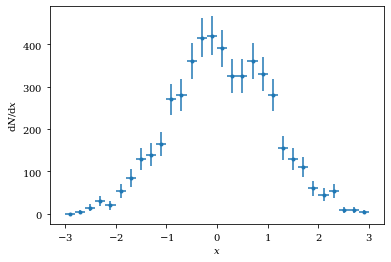

In [25]:
hist = Histogram(linspace(-3,3,31))
for x in normal(size=1000):
    hist.fill(x)

hist.finalize()
hist.plot(fmt='.') 

xlabel(r"$x$")
ylabel(r"$\mathrm{d}N/\mathrm{d}x$");

## Fordelinger

Histogrammer af observeret data er langt henad vejen det vi forstår ved en _empirisk fordeling_.  Lidt mere formelt kan at histogrammet $H$ udtrykker den observerede sandsynlighedsfordeling. Bemærk at vi har brugt to forskellige konventioner 

- Integralet af hele histogrammet er normaliseret til 1.  I dette tilfælde repræsenterer arealet af hver bøtte sandsynligheden 

  $$P(x\in b_i) = l_i h_i = \operatorname{Areal}(b_i)\quad,$$

  hvor $h_i$ og $l_i$ er henholdsvis højden og bredden af bøtten $b_i$.  
  
- Integralet af hele histogrammet er _ikke_ normaliseret men er i stedet lig med antallet af observationer (eller mere generelt - summen af vægte)  

  $$ A = \sum_{i=1}^N l_i h_i\quad.$$

  Her repræsenterer arealet af hver bøtte 

  $$ A P(x\in b_i) = l_i h_i = \operatorname{Areal}(b_i)\quad.$$

## Distributions

Histograms of observed data are to large extend what we understand by an _empirical distribution_. Slightly more formally, the histogram $H$ expresses the observed probability distribution. Note that we have used two different conventions

- The integral of the entire histogram is normalized to 1. In this case, the area of each bin represents the observed probability

  $$P(x\in b_i) = l_i h_i = \operatorname{Area}(b_i)\quad,$$

  where $h_i$ and $l_i$ are the height and width, respectively, of the bin $b_i$.
  
- The integral of the whole histogram is _not_ normalized but instead equals the number of observations (or more generally - the sum of weights)

  $$ A = \sum_{i=1}^N l_i h_i\quad.$$

  Here, the area of each bin represents

  $$ A P(x\in b_i) = l_i h_i = \operatorname{Area}(b_i)\quad.$$

Vi kan skrive bøtte-breden $l_i$ som en ændring i vores variabel $w_i = \Delta x_i$ mens vi kan opfatte sandsynligheden $P(x\in b_i)$ som ændringen af den _kumulative_ sandsynlighed (mere om det senere), hvorfor vi kan skrive $\Delta P_i$ for denne, så vi har henholdsvis

We can write the bin width $l_i$ as a change in our variable $w_i = \Delta x_i$ while we can interpret the probability $P(x\in b_i)$ as the change of the _cumulative_ probability (more on that later), why we can write $\Delta P_i$ for this, so we have, respectively

$$ \Delta P_i = \Delta x_i h_i\qquad A \Delta P_i = \Delta x_i h_i\quad.$$

Hvis vi i begge tilfælde dividerer med bøtte-breden $\Delta x_i$ og lader denne gå mod nul, har vi

If in both cases we divide by the bin width $\Delta x_i$ and let this go to zero, we have

\begin{align*}
\frac{\Delta P_i}{\Delta x_i} &= \frac{1}{A}\frac{\Delta N_i}{\Delta x_i}h_i &\xrightarrow[\Delta x_i\rightarrow 0]{} && \frac{1}{A}\frac{\mathrm{d}N}{\mathrm{d}x}&= h\\
A\frac{\Delta P_i}{\Delta x_i} &= \frac{1}{A} A \frac{\Delta N_i}{\Delta x_i}h_i &\xrightarrow[\Delta x_i\rightarrow 0]{} && \frac{\mathrm{d}N}{\mathrm{d}x}&=h\quad,\\
\end{align*}

hvor $\Delta P_i = N_i / A$ er den observeret sandsynlighed i bøtten $b_i$.  Det forklarer den notation vi brugte tidligere på ordinaten ("$y$"-aksen).  

where $\Delta P_i = N_i / A$ is the observed probability in the bin $b_i$. This explains the notation we used earlier in the ordinate ("$y$" axis).

Dette illustrerer også sammenhængen mellem et histogram og en _sandsynlighedsfordeling_: Histogrammet er en empirisk sandsynlighedsfordeling for den stokastiske (tilfældige, engl. [stocastic](https://en.wikipedia.org/wiki/Stochastic)) variabel $X$ så $X\sim H$.  

Typisk, vil denne fordeling $H$ være en konkret, _tilfældig_ realisation af en anden, _bagvedliggende_ fordelingen $P$.  Ovenover, for eksempel, udtog vi tilfældige tal fra en normalfordeling, så $X\sim N$, og vores histogram $H$ var denne konkrete realisation af $N$.  

Da histogrammet er en _tilfældig_ realisation af den bagvedliggende fordeling $P$ er der _usikkerheder_ associeret med denne konkrete realisation.  Vi har tidligere set, at usikkerheden på sandsynligheden $P_i=l_i h_i$ er givet ved 

This also illustrates the relationship between a histogram and a _probability distribution_: The histogram is an empirical probability distribution of the [stochastic](https://en.wikipedia.org/wiki/Stochastic) (or random) variable $X$ so $X\sim H$.

Typically, this distribution $H$ will be a concrete, _random_ realization of another, _underlying_ distribution $P$. Above, for example, we took random numbers from a normal distribution, so $X\sim N$, and our histogram $H$ was this concrete realization of $N$.

Since the histogram is a _random_ realization of the underlying distribution of $P$, there are _uncertainties_ associated with this concrete realization. We have previously seen that the uncertainty of the probability $P_i=l_i h_i$ is given by

$$
\delta_{P_i} = l_i \begin{cases}
  \sqrt{h_i} & \text{uvægtet, frekvensvægte}\\
  \sqrt{\sum_{x_i \in b_i} w_j^2} & \text{ikke frekvensvægte}\\
  \end{cases}\quad.
$$

Hvis vi derfor søger at finde den _bagvedliggende_ fordeling $P$ for et givent histogram $H$ er det vigtigt at tage højde for disse usikkerheder.

Therefore, if we seek to find the _underlying_ distribution $P$ for a given histogram $H$, it is important to take these uncertainties into account.

### Eksempel: Bagvedliggeende normalfordeling 

Vi laver en konkret realisation af en normalfordeling, og vil derefter forsøge at se hvor sandsynligt det er at denne realisation stammer fra en normalfordeling.  Først definerer vi vores normalfordeling som vi vil tilpasse til data

### Example: Underlying normal distribution

We create a concrete realization of a normal distribution, and will then try to see how likely it is that this realization comes from a normal distribution. First, we define our normal distribution that we will fit to data

$$f(x;A,\mu,\sigma) = \frac{A}{\sqrt{2\pi}}e^{-\frac12\frac{(x-\mu)^2}{\sigma^2}}\quad,$$

hvor $\mu$ er middelværdien, $\sigma^2$ variansen, og $A$ en skaleringsparameter. 

where $\mu$ is the mean, $\sigma^2$ the variance, and $A$ is a scaling parameter.

In [26]:
from numpy import sqrt, exp, pi    

def gaus(x,*pars):
    A, mu, sigma = pars
    return A / sqrt(2*pi) * exp(-0.5*((x-mu)/sigma)**2)

# Alternative: A*scipy.stats.norm.pdf(x,mu,sigma)

Dernæst laver vi vores prøve.  Af hensyn til reproducibilitet sætter vi startpunktet (engl. [seed](https://en.wikipedia.org/wiki/Random_seed)) for vores tilfældige tal. 

Next we make our sample. For the sake of reproducibility, we set the [_seed_](https://en.wikipedia.org/wiki/Random_seed) for our random numbers.

In [27]:
from numpy.random import seed 

seed(1111111)
h, x, l, e = histogram(normal(size=1000),normalize=True)

Nu kan vil forsøge at tilpasse vores funktion `gaus` til data.  Det gør vi ved brug af `scipy.optimize.curve_fit` som giver os tilbage det bedste estimat af parametrene til `gaus` samt kovariansmatrixen mellem parametrene.   Usikkerheden på parameteren $p_i$ er givet ved kvadratroden af elementet $c_{i,i}$ af kovariansmatrixen.  

Now we can try to fit our function `gaus` to data. We do this by using `scipy.optimize.curve_fit` which returns us the best estimate of the parameters for `gaus` and the covariance matrix between the parameters. The uncertainty of the parameter $p_i$ is given by the square root of the element $c_{i,i}$ of the covariance matrix.

Vi udregner også $\chi^2$ samt antallet af frihedsgrader $\nu$ ved 

We also calculate $\chi^2$ and the number of degrees of freedom $\nu$ as

\begin{align*}
  \chi^2 &= \sum_{i=1}^N \frac{\left[y_i - f(x_i)\right]^2}{\delta_{y_i}^2}\\
  \nu &= N - N_{f}\quad,\\
\end{align*}

hvor $x_i,y_i,\delta_{y_i}$ er henholdsvis histogram bøtte midpunkter, værdierne og usikkerheder, $f$ er den funktion vi tilpaser, $N$ er antalet af bøtter, og $N_{f}=3$ er antalet af parametre til funktionen $f$.

where $x_i,y_i,\delta_{y_i}$ is histogram bin midpoints, values, and uncertainties, $f$ is the function we are fitting, $N$ is the number of bins, and $N_{f}=3$ is the number of parameters for the $f$ function.

In [28]:
from scipy.optimize import curve_fit

pval, pcov = curve_fit(gaus,x,h,(1,0,1),sigma=e)
chi2       = (((h-gaus(x,*pval))/e)**2).sum()
nu         = len(x)-len(pval)

Endelig tegner vi vores data og den tilpasset funktion.  Vi skriver nogle informationer om tilpasningen ind i figuren.  Bemærk at vi afrunder de fundne parameter værdier og usikkerheder som tidligere beskrevet. 

Finally, we draw our data and the fitted function. We write some information about the fit into the figure. Note that we round off the found parameter values and uncertainties as previously described.

Data og tilpasset underligende fordeling.

Data and fitted underlying distribution.

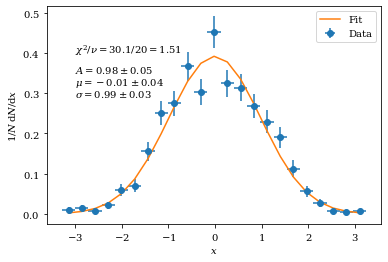

In [29]:
from matplotlib.pyplot import text, legend, plot
from numpy import diagonal

plot_hist(h,x,l,e,fmt="o",label="Data")

xlabel(r"$x$")
ylabel(r"$1/N\,\mathrm{d}N/\mathrm{d}x$")
plot(x,gaus(x,*pval),label="Fit")

xt = -3
yt = .4
text(xt,yt, r"$\chi^2/\nu={:.1f}/{}={:.2f}$"
     .format(chi2,nu,chi2/nu))
yt -= .05
names = ["A", r"\mu", r"\sigma"]
for p, pe, n in zip(pval,sqrt(diagonal(pcov)),names):
    t = format_result(p,pe,1,latex=True,name=n)
    text(xt,yt,fr"${t}$")
    yt -= .03

legend();

## Opsummering

Histogrammer er nyttige til at lave statistisk analyse.  Vi har set at histogrammer udgør en _målt_ sandsynlighedsfordeling for kontinuerer variable.  Vores funktion `histogram` giver os en bekvem måde at lave et histogram hvor vi _også_ får usikkerhederne bestemt.  Vores tre sammenhængende funktioner 

- `init_histogram` 
- `fill_histogram` 
- `fini_histogram` 

giver os en metode til at fylde histogrammer løbende uden nødvendigvis at gemme hele prøven. Klassen `Histogram` indkoder dette i et objekt som kan være nemmere at håndterer.  Endelig har vi funktionen `plot_hist` som tegner vores histogrammer. 

## Summary

Histograms are useful for making statistical analysis. We have seen that histograms represent a _measured_ probability distribution for continuous variables. Our function `histogram` gives us a convenient way to make a histogram where we _also_ get the uncertainties determined. Our three coherent functions

- `init_histogram`
- `fill_histogram`
- `fini_histogram`

gives us a method to fill histograms continuously without necessarily saving the entire sample. The class `Histogram` encodes this behaviour as in a single object which may be easier to handle.  Finally, the function `plot_hist` allows us to easily plot our histograms. 

In [30]:
histogram.__doc__=\
    """Build a histogram of data in a
    
    Optionally, each observation in a can be weighted by giving 
    an array of equal size as the argument weights.  
    
    If weights are given and frequency is set to True, then we
    assume the weights are frequency weights (i.e., x_i was seen w_i 
    times), and we use the regular NumPy histogram funktion 
    
    If weights are given, but frequency is set to False, then we 
    need to calculate the sum of square weights in each bin, which
    - unfortunately - NumPy does not provide.  
    
    Parameters
    ----------
    a : array-like 
        Input data.  
    bins : int or sequence of scalars or str
        Defines the binning used by the histogram.  
        
        If a string, the corresponding binning method is used.
        Note, binning methods are not supported for weighted 
        observations 
        
        If an integer, specifies the number of bins between 
        rnge or minimum and maximum of a
        
        If a sequence of scalars, then that sequence defines 
        the bin edges 
    rnge : (float,float
        Least and largest values to consider.  If not set, 
        defaults to minimum and maximum of a, respectively 
    weights : array-like , optional
        An array of weights with the same shape as a
    frequency : bool, optional 
        If weights are given and this flag is set, assume that 
        the weights are integer frequency weights 
    normalize : bool, optional 
        If true, normalize this bins so that the total integral 
        (sum of heights times widhts) is 1. 
    
    Returns
    -------
    n : array-like 
        Bin height.  This times the width gives the (possibly normalized) 
        observed probability 
    mid : array-like 
        Mid-point of bins 
    widths : array-like 
        Widths of bins 
    uncer : array-like 
        Uncertainty of n in each bin
            
    Raises
    ------
    ValueError : 
        if weights are given and frequency=False and any 
        of the weights are negative 

    See also 
    --------
    init_histogram, fill_histogram, fini_histogram, plot_hist, Histogram
    """

In [31]:
plot_hist.__doc__ = \
    """Plot a histogram 
    
    Parameters
    ----------
    n : array-like 
        Bin contents 
    x : array-like 
        Bin centers 
    wx : array-like 
        Bin widths 
    en : array-like 
        Uncertainty on bin content 
    b : array-like 
        For bar charts, set the bottom.  Note, the top of the bars
        will be at `b + n`
    ax : matplotlib.axes.Axes 
        Axes to plot in.  If None, plot in current axes 
    as_bar : bool 
        If true, plot as a bar chart, otherwise as errorbars 
    kwargs : dict 
        Additional keyword arguments for artist 
    
    Returns
    -------
    container : matplotlib.container.BarContainer, matplotlib.container.ErrorbarContainer
        Container of artists 
        
    See also 
    --------
    init_histogram, fill_histogram, fini_histogram, histogram, Histogram
    """

In [32]:
plot_hist_with_poisson.__doc__ =\
    """Plot a histogram with Poisson distributions on top"""

In [33]:
init_histogram.__doc__=\
    """Initialize a histogram structure 
    
    The returned structure can be passed to fill_histogram as the second argument 
    unraveled by a *
    
    Parameters
    ---------- 
    bins : array-like 
        Array of bin borders of length N+1 
    weighted : bool, optional 
        If true, then also include space for weighted filling
        
    Returns
    -------
    bins : array-like 
        The bin borders. Returned here so we can pass to fill_histogram 
    sumw : array-like 
        The N bin content holders 
    sumw2 : array-like or None 
        The N bin squared weights
        
    Examples
    -------- 
    
    >>> hist = init_histogram(np.linspace(-3,3,31))
        
    See also 
    --------
    Histogram, fill_histogram, fini_histogram
    """

In [34]:
fill_histogram.__doc__=\
    """Fill a histogram 
    
    If the histogram structure was made with init_histogram, 
    we can do 
    
    >>> hist = init_histogram(bins)
    >>> for x in data: 
    ...     hist = fill_histogram(x,hist)
    
    Parameters
    ----------
    x : float 
        Observation to record 
    bins : array-like 
        Bin borders 
    sumw : array-like 
        Summed bin count (or weights) 
    sumw2 : array-like (optional)
        Summed squared bin count (or weights)
    weight : float (optional)
        Weight of observation x. The interpretation of 
        this depends on whether no sumw2 is given or not
        
        If sumw2 is None, then this weight is assumed to be 
        a frequency weight. 
        
        If sumw2 is given, then the weight is assumed to be 
        a non-frequency weight 
            
    Returns
    -------
    bins : array-like 
        The bin borders 
    sumw : array-like 
        The updated sum bin count 
    sumw2 : array-like or none 
        the updates sum squared bin count 

    See also 
    --------
    init_histogram, Histogram, fini_histogram
    """

In [35]:
fini_histogram.__doc__=\
    """Finalize histogram
    
    If the histogram structure was made using init_histogram, then 
    we can pass that as the first argument 
    
    >>> hist = init_histogram(bins)
    >>> for x in data: 
    ....    hist = fill_histogram(x,*hist)
    >>> fini_histogram(hist)
    
    Parameters
    ----------
    bins : array-like 
        Bin borders 
    sumw : array-like 
        Sum of bin count (weights)
    sumw2 : array-like (optional)
        Sum of squared bin count (weights)
    
    Returns
    ------- 
    h : array-like 
        Histogram 
    m : array-like 
        Bin centers 
    w : array-like 
        Bin widths 
    e : array-like 
        Uncertainty on bins 
        
    See also 
    --------
    init_histogram, fill_histogram, Histogram
    """

In [36]:
Histogram.__doc__=\
    """A 1 dimensional histogram class
    
    The internal state
    ------------------
    - bins : array-like 
      The bin borders. Returned here so we can pass to fill_histogram 
    - sumw : array-like 
      The N bin content holders 
    - sumw2 : array-like or None 
      The N bin squared weights
    - hist : array-like, or None 
      Only filled after finalize has been called
    - uncer : array-like, or None
      Only filled after finalize has been called
            
    Initializes the histogram object

    Parameters
    ---------- 
    bins : array-like 
        Array of bin borders of length N+1 
    weighted : bool, optional 
        If true, then also include space for weighted filling    
    
    See also 
    --------
    init_histogram, fill_histogram, fini_histogram
    """
    
Histogram.fill.__doc__=\
    """Fill a histogram 

    Parameters
    ----------
    x : float 
        Observation to record 
    weight : float (optional)
        Weight of observation x. The interpretation of 
        this depends on whether no sumw2 is initialized or not
    
        If sumw2 is None, then this weight is assumed to be 
        a frequency weight. 
    
        If sumw2 is given, then the weight is assumed to be 
        a non-frequency weight 
    """
        
Histogram.finalize.__doc__=\
    """Finalize histogram
    
    Returns
    ------- 
    h : array-like 
        Histogram 
    m : array-like 
        Bin centers 
    w : array-like 
        Bin widths 
    e : array-like 
        Uncertainty on bins
    """

Histogram.bins.__doc__=\
    """Return bin limits"""

Histogram.centers.__doc__=\
    """Return the bin centers"""

Histogram.heights.__doc__=\
    """Return bin heights, possibly None"""

Histogram.widths.__doc__=\
    """Return bin widths"""

Histogram.uncertainties.__doc__=\
    """Uncertainties on bin heights, possibly None"""

Histogram.sums.__doc__=\
    """Returns sum of (weighted) observations"""

Histogram.sumWeightsSquare.__doc__=\
    """Return sum of square weighted observations or None"""

Histogram.plot.__doc__=\
    """Plot histogram 
    
    This method simply calls `plot_hist` with the 
    
    - bin content 
    - bin centres 
    - bin widths 
    - bin content uncertainties
    
    Parameters
    ----------
    *args : tuple 
        Additional arguments for `plot_hist`
    **kwargs : dict 
        Additional keyword arguments for `plot_hist`
    """